<a href="https://colab.research.google.com/github/Pulik1/SkillCraftTechnology/blob/main/SCT_0437_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload the dataset manually

Saving heart.csv to heart.csv


In [25]:
# Import necessary libraries
import pandas as pd

# 1. Load the dataset
# Replace 'heart.csv' with the actual file path of your dataset
data = pd.read_csv('heart.csv')

# 2. Check for missing values in the dataset
print("Checking for missing values:")
print(data.isnull().sum())

# 3. Handle missing values:
# For continuous variables like 'age' and 'chol', fill missing values with the median
data['age'] = data['age'].fillna(data['age'].median())
data['chol'] = data['chol'].fillna(data['chol'].median())

# For categorical variables like 'sex', 'cp', fill missing values with the mode (most frequent value)
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])
data['cp'] = data['cp'].fillna(data['cp'].mode()[0])

# 4. Drop irrelevant columns:
# These columns are likely identifiers or non-useful for analysis
data.drop(['ca', 'thal'], axis=1, inplace=True)  # Fixed the typo: changed 'inlace' to 'inplace'

# 5. Check and remove duplicate rows if any:
print(f"Number of duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

# 6. Ensure correct data types for columns:
# Convert 'age' to float (if necessary) and 'sex' to a categorical variable
data['age'] = data['age'].astype(float)
data['sex'] = data['sex'].astype('category')

# 7. Check data types to ensure they are correct
print("Data types after cleaning:")
print(data.dtypes)

# 8. Handle outliers using Interquartile Range (IQR) for a feature like 'age':
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
# Removing outliers based on IQR for the 'age' feature
data = data[(data['age'] >= (Q1 - 1.5 * IQR)) & (data['age'] <= (Q3 + 1.5 * IQR))]

# 9. Check the cleaned data
print("Cleaned dataset:")
print(data.head())



Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Number of duplicate rows: 723
Data types after cleaning:
age          float64
sex         category
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
target         int64
dtype: object
Cleaned dataset:
    age sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  52.0   1   0       125   212    0        1      168      0      1.0      2   
1  53.0   1   0       140   203    1        0      155      1      3.1      0   
2  70.0   1   0       145   174    0        1      125      1      2.6      0   
3  61.0   1   0       148   203    0        1      161      0      0.0      2   
4  62.0   0   0  

In [15]:
# Exploratory Data Analysis (EDA)
# Exploring the relationships between variables and identify patterns and trends in the data
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
             age          cp    trestbps        chol         fbs     restecg  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.963576  131.602649  246.500000    0.149007    0.526490   
std      9.04797    1.032044   17.563394   51.753489    0.356686    0.526027   
min     29.00000    0.000000   94.000000  126.000000    0.000000    0.000000   
25%     48.00000    0.000000  120.000000  211.000000    0.000000    0.000000   
50%     55.50000    1.000000  130.000000  240.500000    0.000000    1.000000   
75%     61.00000    2.000000  140.000000  274.750000    0.000000    1.000000   
max     77.00000    3.000000  200.000000  564.000000    1.000000    2.000000   

          thalach       exang     oldpeak       slope      target  
count  302.000000  302.000000  302.000000  302.000000  302.000000  
mean   149.569536    0.327815    1.043046    1.397351    0.543046  
std     22.903527    0.470196    1.1614

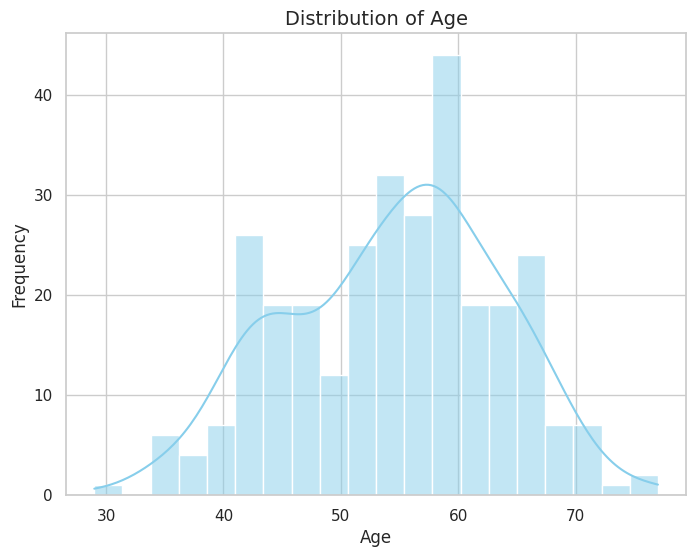

In [16]:
# Visualize the distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


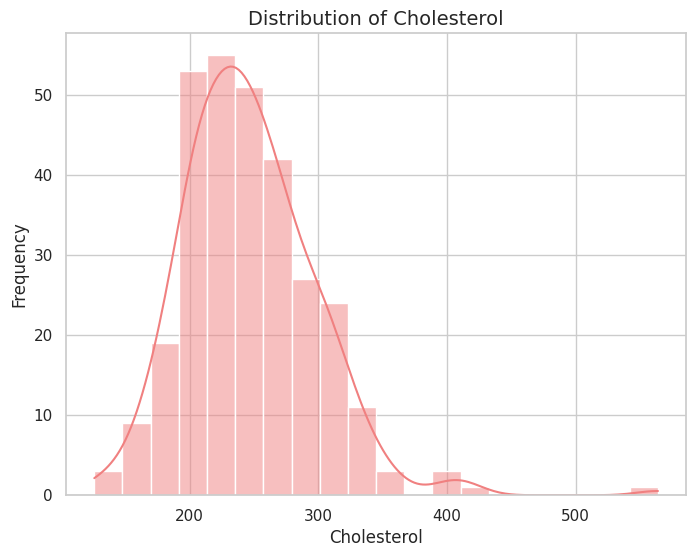

In [17]:
# Visualize the distribution of 'chol' (Cholesterol)
plt.figure(figsize=(8, 6))
sns.histplot(data['chol'], kde=True, color='lightcoral', bins=20)
plt.title('Distribution of Cholesterol', fontsize=14)
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


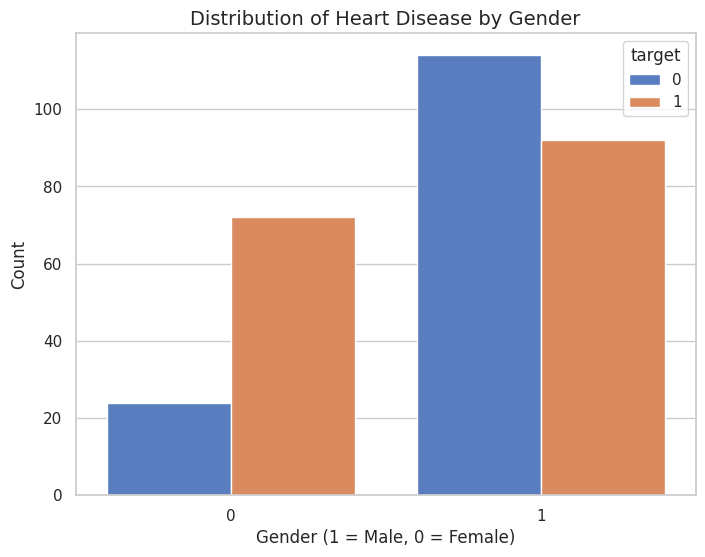

In [18]:
# Visualize the count of males and females with respect to heart disease
# We filter the dataset to include those who have pre-existing heart condition and plot the count of 'target' (heart disease)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='sex', hue='target', palette='muted')
plt.title('Distribution of Heart Disease by Gender', fontsize=14)
plt.xlabel('Gender (1 = Male, 0 = Female)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

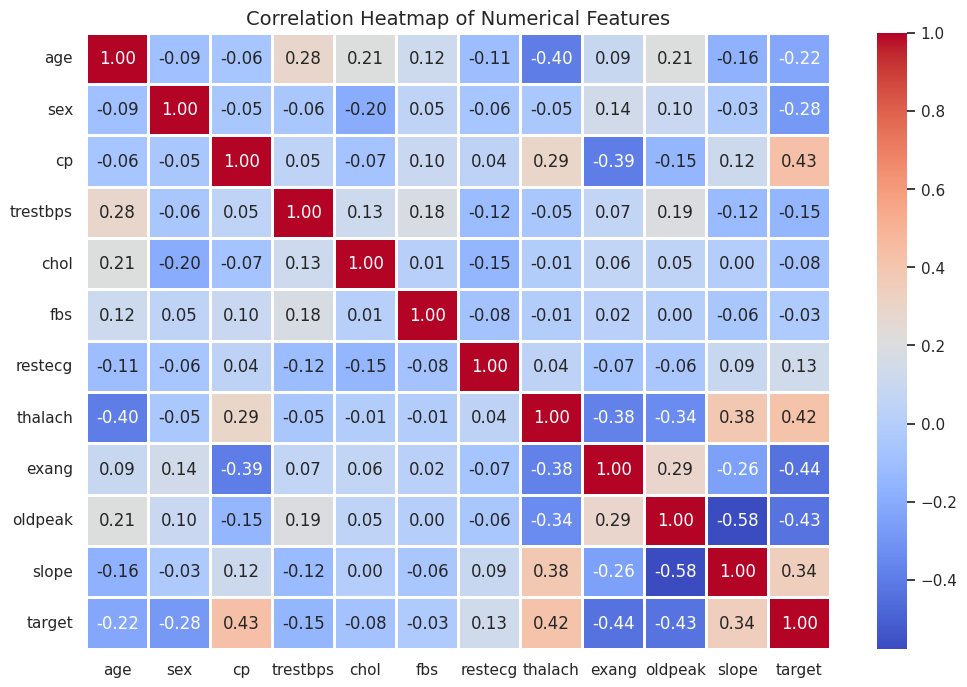

In [20]:
# Visualizing the correlation matrix between all numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()


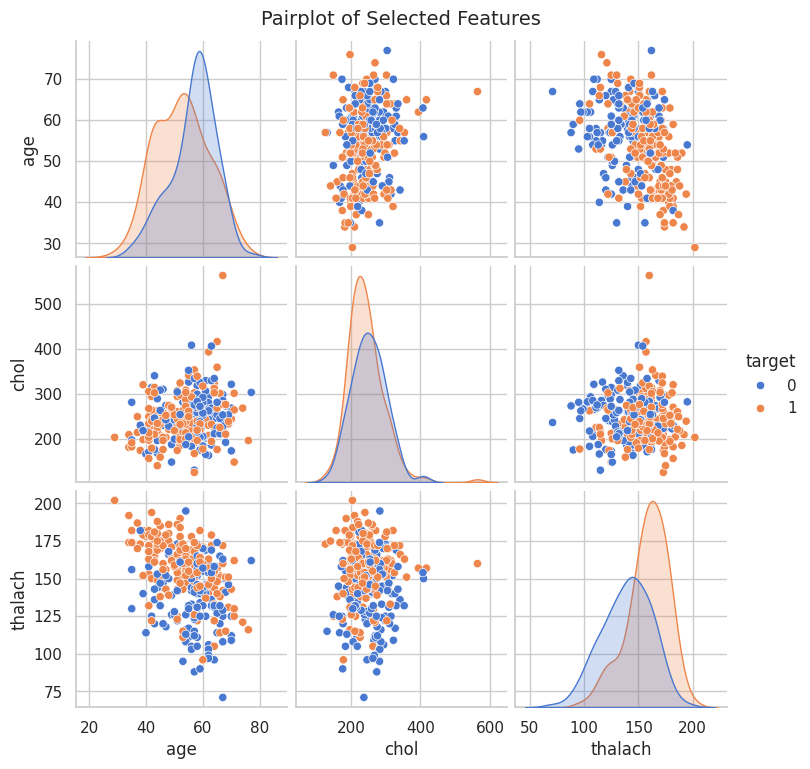

In [22]:
# Pairplot to visualize relationships between selected features: 'age', 'chol', 'thalach', 'target'
sns.pairplot(data[['age', 'chol', 'thalach', 'target']], hue='target', palette='muted')
plt.suptitle('Pairplot of Selected Features', fontsize=14, y=1.02)
plt.show()


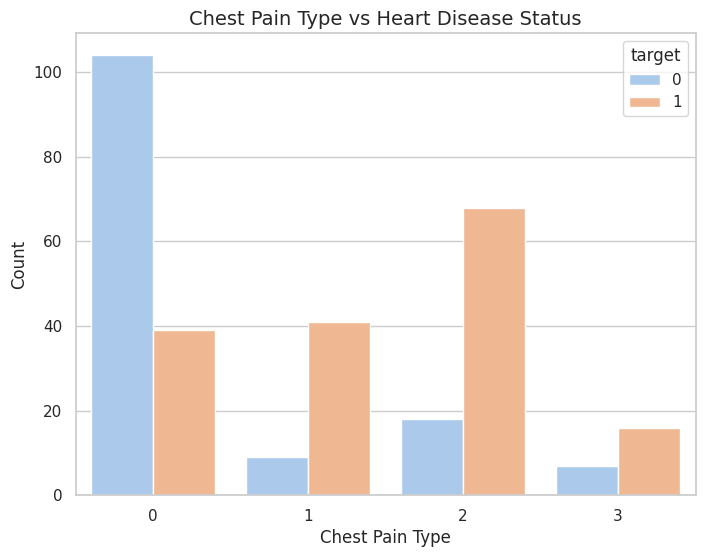

In [23]:
# Count plot to see how chest pain type relates to the presence of heart disease
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='cp', hue='target', palette='pastel')
plt.title('Chest Pain Type vs Heart Disease Status', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()